In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Crop_recommendation (1).csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


**from above code its clear that there are no null entries in the dataset**

**check how many categories response variable has**

In [ ]:
label_count=data['label'].unique()
print(len(label_count))
data['label'].value_counts()

22


maize          100
grapes         100
orange         100
pigeonpeas     100
jute           100
coffee         100
lentil         100
coconut        100
muskmelon      100
mothbeans      100
chickpea       100
pomegranate    100
cotton         100
mango          100
apple          100
watermelon     100
banana         100
papaya         100
blackgram      100
rice           100
mungbean       100
kidneybeans    100
Name: label, dtype: int64

 **from above code we can see that there are 22 classes of response variable and each category 100 obervations so it is balenced dataset**

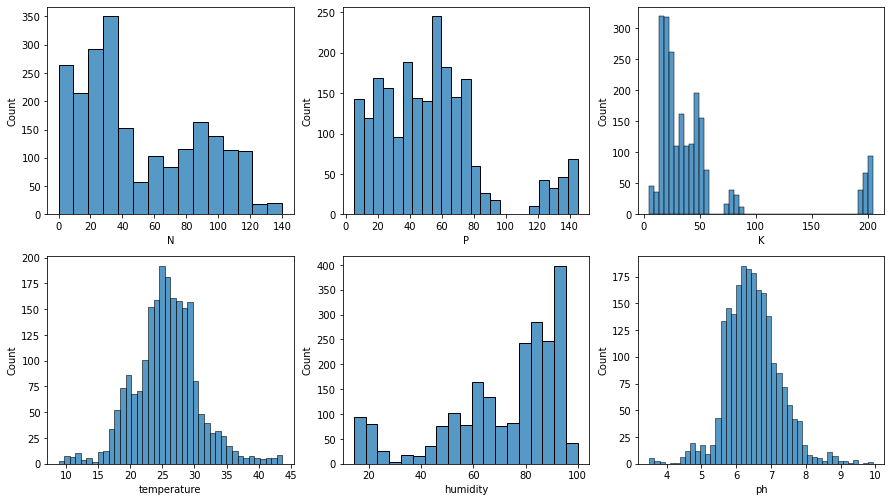

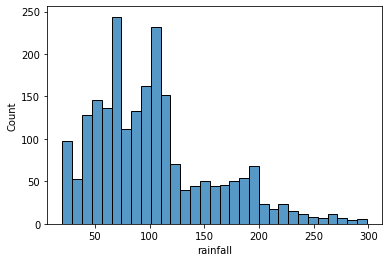

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
all_columns = data.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(data[column])
    i+=1
plt.show()

sns.histplot(data[all_columns[-1]])
plt.show()

**from above code it is clear that almost all variables are skewed**

**lets have a look at which crops needs very high and low amount of N,P K etc content in soil. Took below values by looking at histograms**

In [ ]:
print('crops which requires very high ratio of Nitrogen content in soil:', data[data['N']>120]['label'].unique())
print('crops which requires very high ratio of Phosphorous content in soil:', data[data['P']>100]['label'].unique())
print('crops which requires very high ratio of Potassium content in soil:', data[data['K']>150]['label'].unique())
print('crops which requires very high rainfall:', data[data['rainfall']>200]['label'].unique())
print('crops which requires very low temperature:', data[data['temperature']<10]['label'].unique())
print('crops which requires very high temperature:', data[data['temperature']>40]['label'].unique())
print('crops which requires very low humidity:', data[data['humidity']<20]['label'].unique())
print('crops which requires very low ph:', data[data['ph']<4]['label'].unique())
print('crops which requires very high ph:', data[data['ph']>9]['label'].unique())

crops which requires very high ratio of Nitrogen content in soil: ['cotton']
crops which requires very high ratio of Phosphorous content in soil: ['grapes' 'apple']
crops which requires very high ratio of Potassium content in soil: ['grapes' 'apple']
crops which requires very high rainfall: ['rice' 'papaya' 'coconut']
crops which requires very low temperature: ['grapes']
crops which requires very high temperature: ['grapes' 'papaya']
crops which requires very low humidity: ['chickpea' 'kidneybeans']
crops which requires very low ph: ['mothbeans']
crops which requires very high ph: ['mothbeans']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 0, 'rainfall')

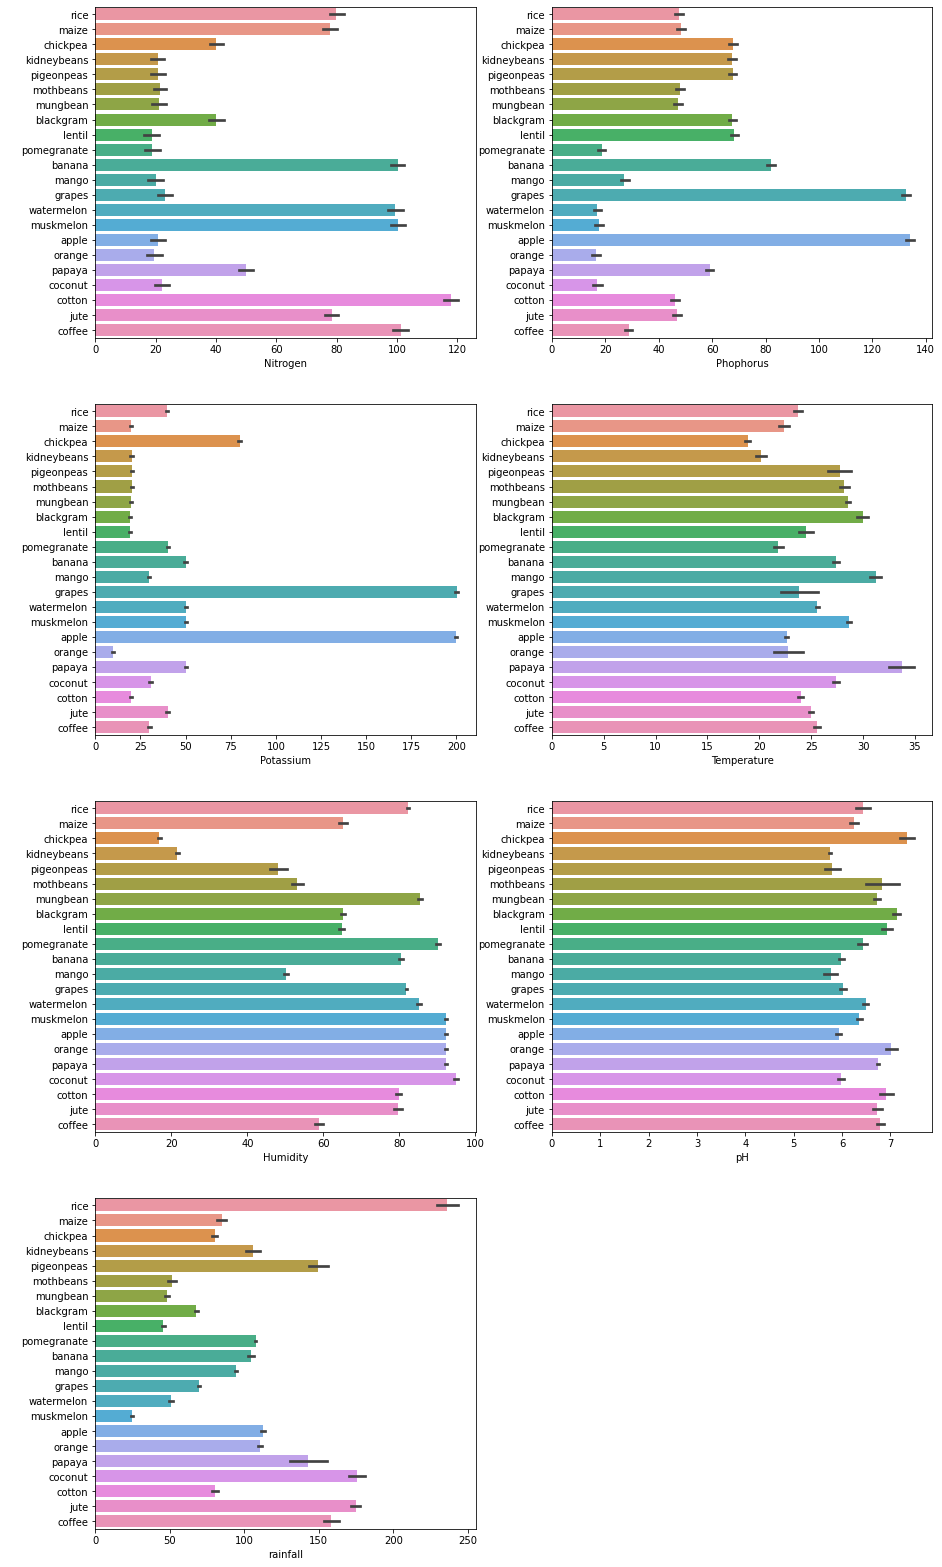

In [ ]:
plt.figure(figsize=(15, 28))
plt.subplot(4,2,1)
sns.barplot(data['N'], data['label'])
plt.ylabel(' ')
plt.xlabel('Nitrogen')
plt.subplot(4,2,2)
sns.barplot(data['P'], data['label'])
plt.ylabel(' ')
plt.xlabel('Phophorus')
plt.subplot(4,2,3)
sns.barplot(data['K'], data['label'])
plt.ylabel(' ')
plt.xlabel('Potassium')
plt.subplot(4,2,4)
sns.barplot(data['temperature'], data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature')
plt.subplot(4,2,5)
sns.barplot(data['humidity'], data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity')
plt.subplot(4,2,6)
sns.barplot(data['ph'], data['label'])
plt.ylabel(' ')
plt.xlabel('pH')
plt.subplot(4,2,7)
sns.barplot(data['rainfall'], data['label'])
plt.ylabel(' ')
plt.xlabel('rainfall')


1. All crops require more than pH value of 5 to grow
2. Grapes and Apple requires very high amount of phosphorus and Potassium
3. least amount of potassium is the favorable condition of Orange to grow
4. Papaya requires more than 30 degree to grow well whereas others required <= 30 degree
5. chickpea and kidneybeans humidity requires very less humidity to grow
6. Cotton requires high amount of Nitogen
7. Rice requires very heavy rainfall where the muskmelon requires the least 

**From above we can see that mothbeans can be grown in low or high ph soil.Grapes can be grown in high or low temperature & require high P,K content in soil**

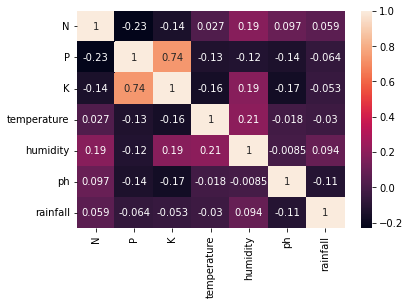

In [ ]:
sns.heatmap(data.corr(),annot=True)

**From above we can see that all variables are independent of each other except K& P which shows moderate amount of correlation**

**Multinomial logistic regression**

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
y=data['label']
x=data[['N','P','K','temperature','humidity','ph','rainfall']]
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(n_scores)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


[0.94090909 0.95454545 0.96363636 0.95909091 0.95909091 0.96818182
 0.96363636 0.97272727 0.95909091 0.95909091 0.96363636 0.95454545
 0.96818182 0.97272727 0.95454545 0.93636364 0.94090909 0.97272727
 0.97272727 0.94545455 0.97272727 0.95454545 0.95909091 0.96363636
 0.96818182 0.95       0.95909091 0.95909091 0.95909091 0.95      ]
Mean Accuracy: 0.959 (0.010)


**Decesion tree implementation**

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
x=data[['N','P','K','temperature','humidity','ph','rainfall']]
y=data['label']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.2,  random_state=2)
acc = []
model = []        
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
z = metrics.accuracy_score(Ytest, predicted_values)
acc.append(z)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", z*100)

print(classification_report(Ytest,predicted_values))                                 


DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**we are getting an accuracy of 90% using decision tree**

**Will try to use gridsearch method to fine best hyperparameter value** 

---



In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9895454545454546 {'max_depth': 18}


**From above we can see that at max depth of 13 we are getting best accuracy of 98.90% .Now will fit decision tree using this parameter value to get precision and recall values**

In [ ]:
acc = []
model = []        
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=13)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
z = metrics.accuracy_score(Ytest, predicted_values)
acc.append(z)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", z*100)

print(classification_report(Ytest,predicted_values))                                 


DecisionTrees's Accuracy is:  98.18181818181819
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.89      0.89        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

**We know that looking at accuracy is not sufficient for decision making so we look at presicion and recall values and from we are getting good precision recall for almost every class . its around 1 for each class .It means every observation gets classified into correct class.**

**Will try to use other techniques to improve the model performance further**

**Will try XGBoost method here but it reuqires numerical data in normalized form and categorical data in encoded form so will first do it**

In [ ]:
import xgboost
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["label"])
label_dict = {}
for i in range(22):
    label_dict[i] = label_encoder.inverse_transform([i])[0]
label_dict

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [ ]:
x=data[['N','P','K','temperature','humidity','ph','rainfall']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")


Train Data: (1760, 7), (1760,)
Train Data: (440, 7), (440,)
shape of training data is (2200, 7) (2200,)


Accuracy on Test Data: 99.54545454545455%


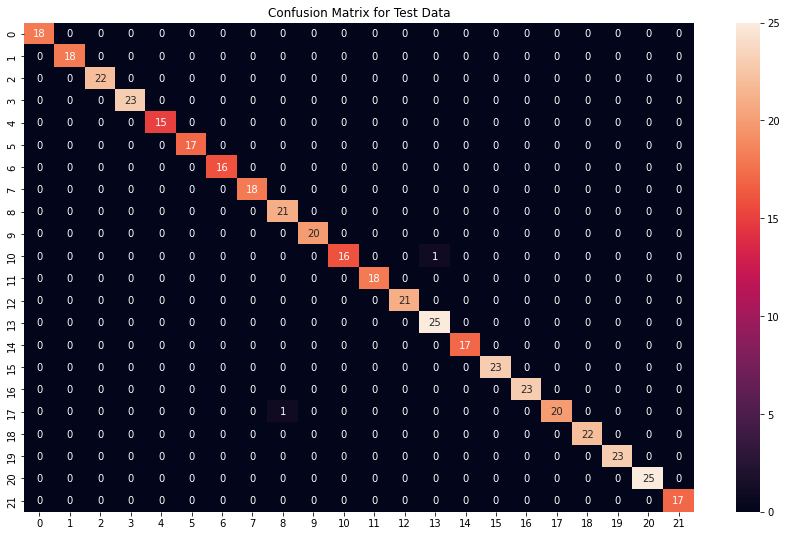

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()





**From above confusion matix we can see that only one observation gets misclassified here and we are getting almost 99.54% accuracy for the model**